 #  A Whale off the Port-folio Analysis
 ---

Using Python and Pandas I will evaluate performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

## Whale Returns

Read the Whale Portfolio daily returns data and clean

In [2]:
# reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(
    whale_returns_csv, 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
    )
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

Read the algorithmic daily returns and clean data

In [5]:
# reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(
    algo_returns_csv, 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
    )
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Reading S&P 500 historic closing prices to create a new daily returns DF from data. 

In [8]:
# reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history = pd.read_csv(
    sp500_history_csv, 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
    )
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# check datatypes
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# fix datatypes
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

C:\Users\leila\AppData\Local\Temp\ipykernel_20284\3809934993.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")


Close    float64
dtype: object

In [11]:
# calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# rename `Close` column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DF with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

## Performance Anlysis

AxesSubplot(0.125,0.2;0.775x0.68)


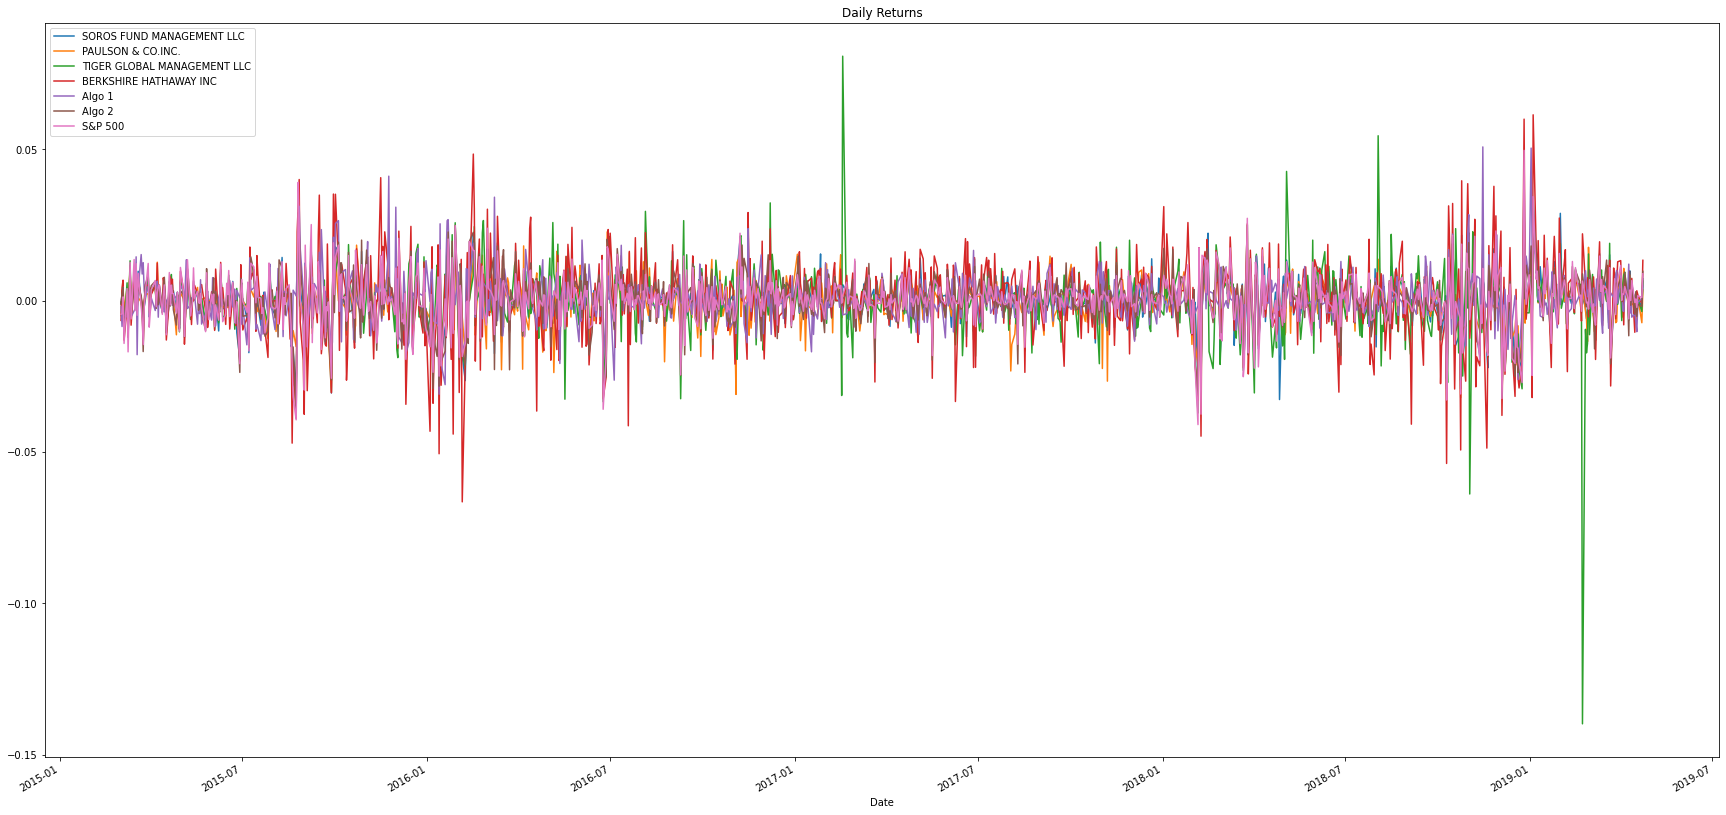

In [15]:
# plotting daily returns of all portfolios
print(all_portfolios.plot(figsize=(30, 15), title="Daily Returns"))

Calculate and plotting cumulative returns.

AxesSubplot(0.125,0.2;0.775x0.68)


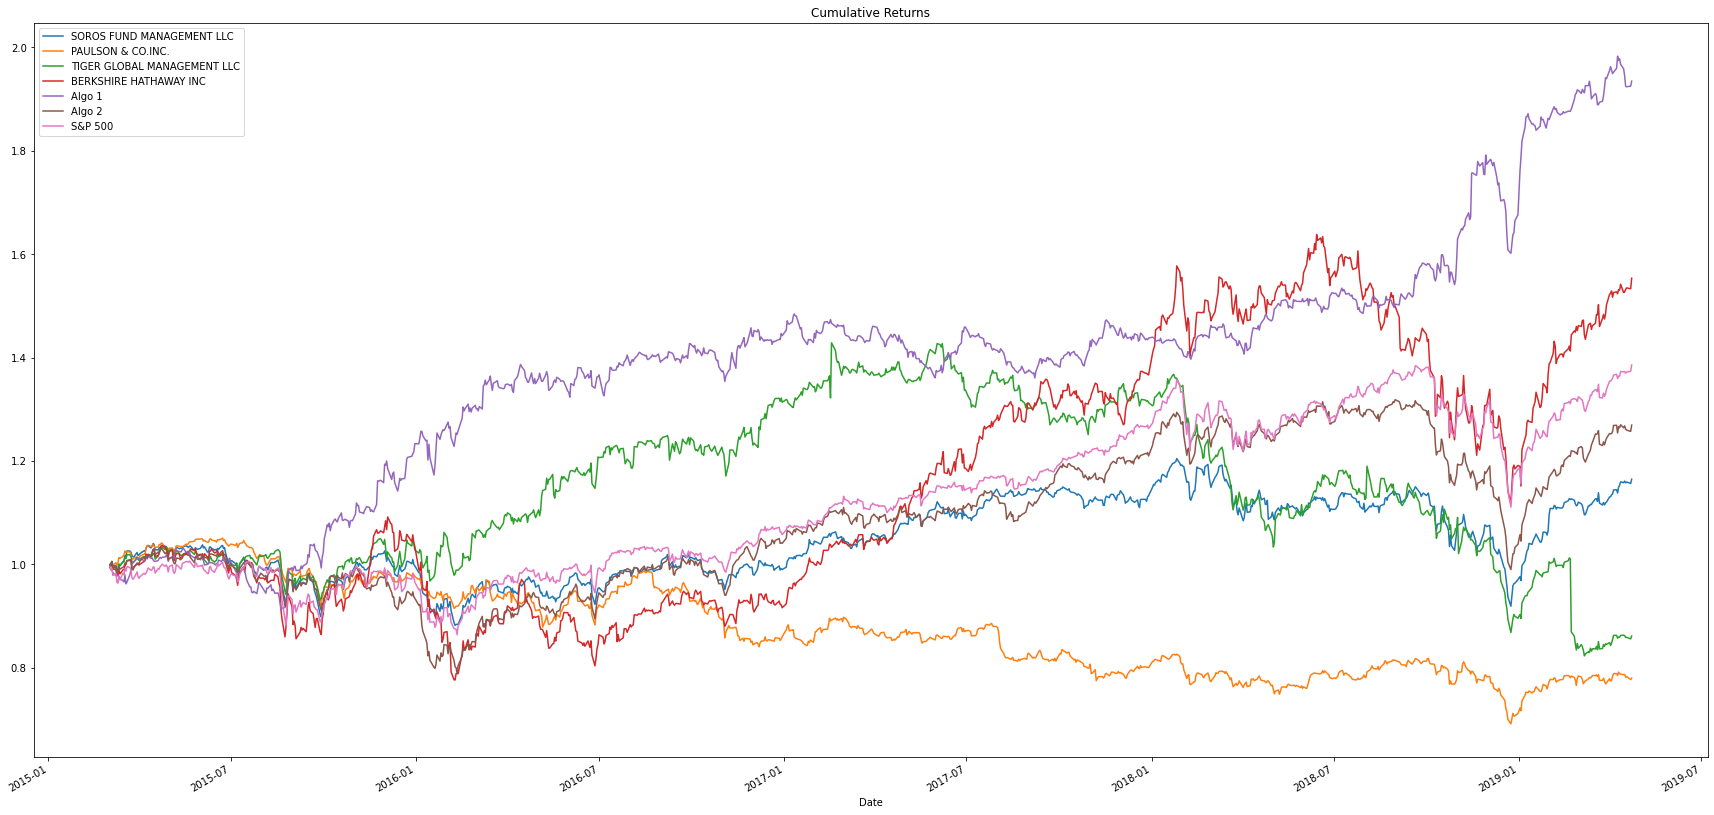

In [16]:
# calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# plot cumulative returns
print(cumulative_returns.plot(figsize=(30, 15), title="Cumulative Returns"))

---

## Risk Analysis

### Box plots


AxesSubplot(0.125,0.125;0.775x0.755)


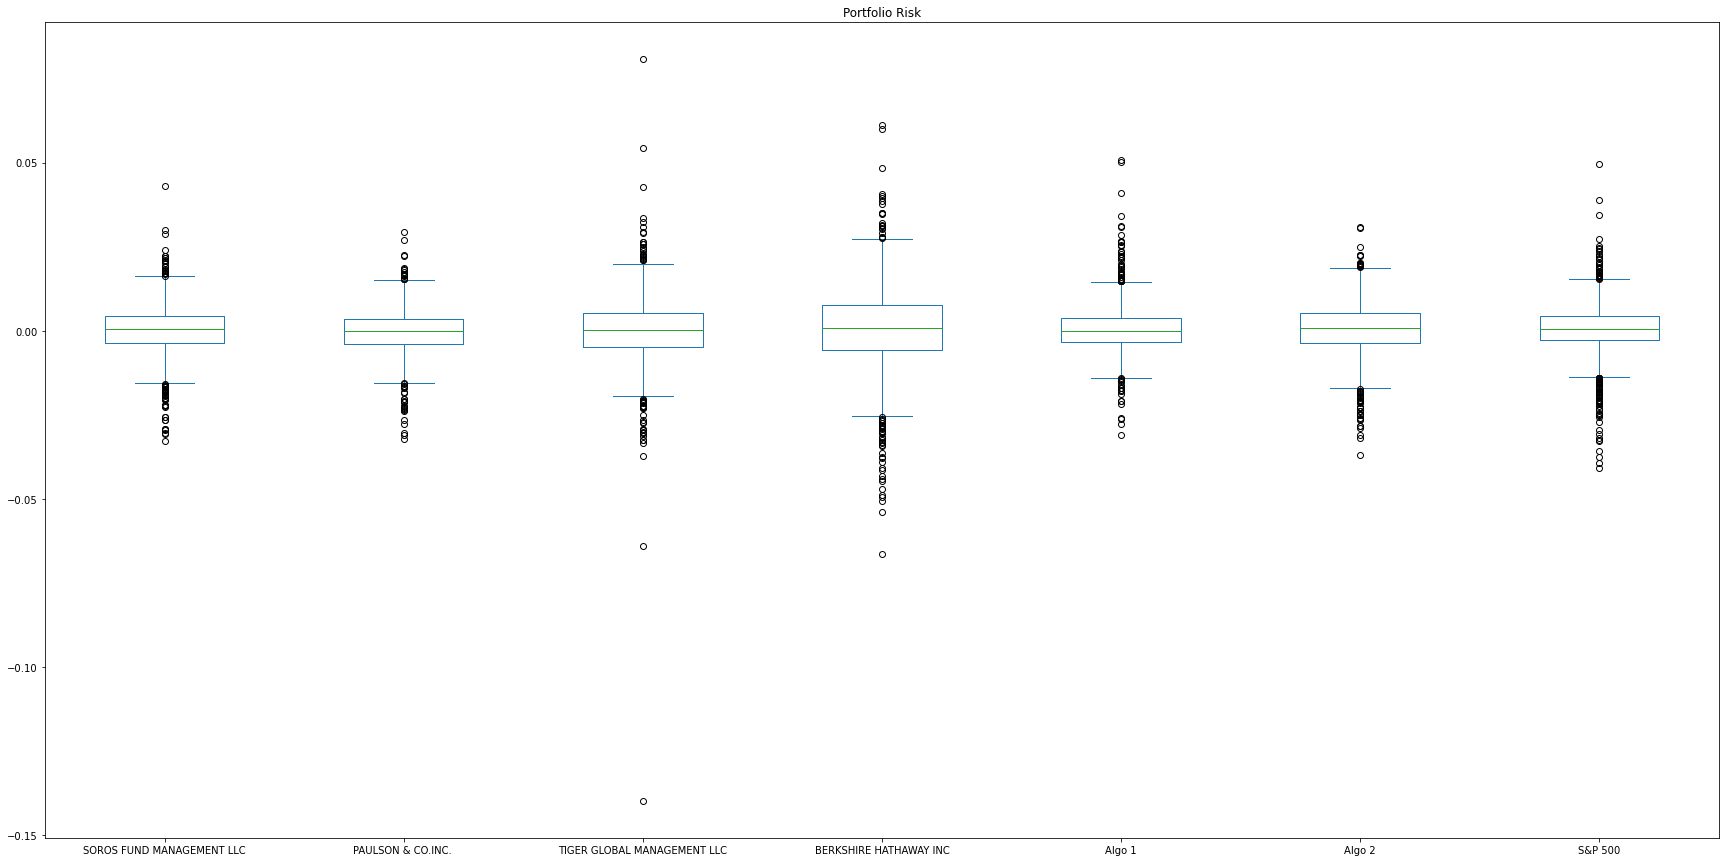

In [17]:
# box plot to visually show risk
print(all_portfolios.plot.box(figsize=(30, 15), title="Portfolio Risk"))

### Standard Deviations

In [18]:
# calculate the daily standard deviations for all portfolios
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Which portfolios are riskier than the S&P 500?

In [19]:
# calculating the daily standard deviation of S&P 500
sp500_risk = all_portfolios["S&P 500"].std()

# determine here which portfolios are riskier than the S&P 500
all_portfolios.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Annualized Standard Deviation

In [20]:
# now I calculate the annualized standard deviation (252 trading days)
anual_std = all_portfolios.std() * np.sqrt(252)
anual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Here we analyze the rolling statistics for Risk and Beta. 

AxesSubplot(0.125,0.2;0.775x0.68)


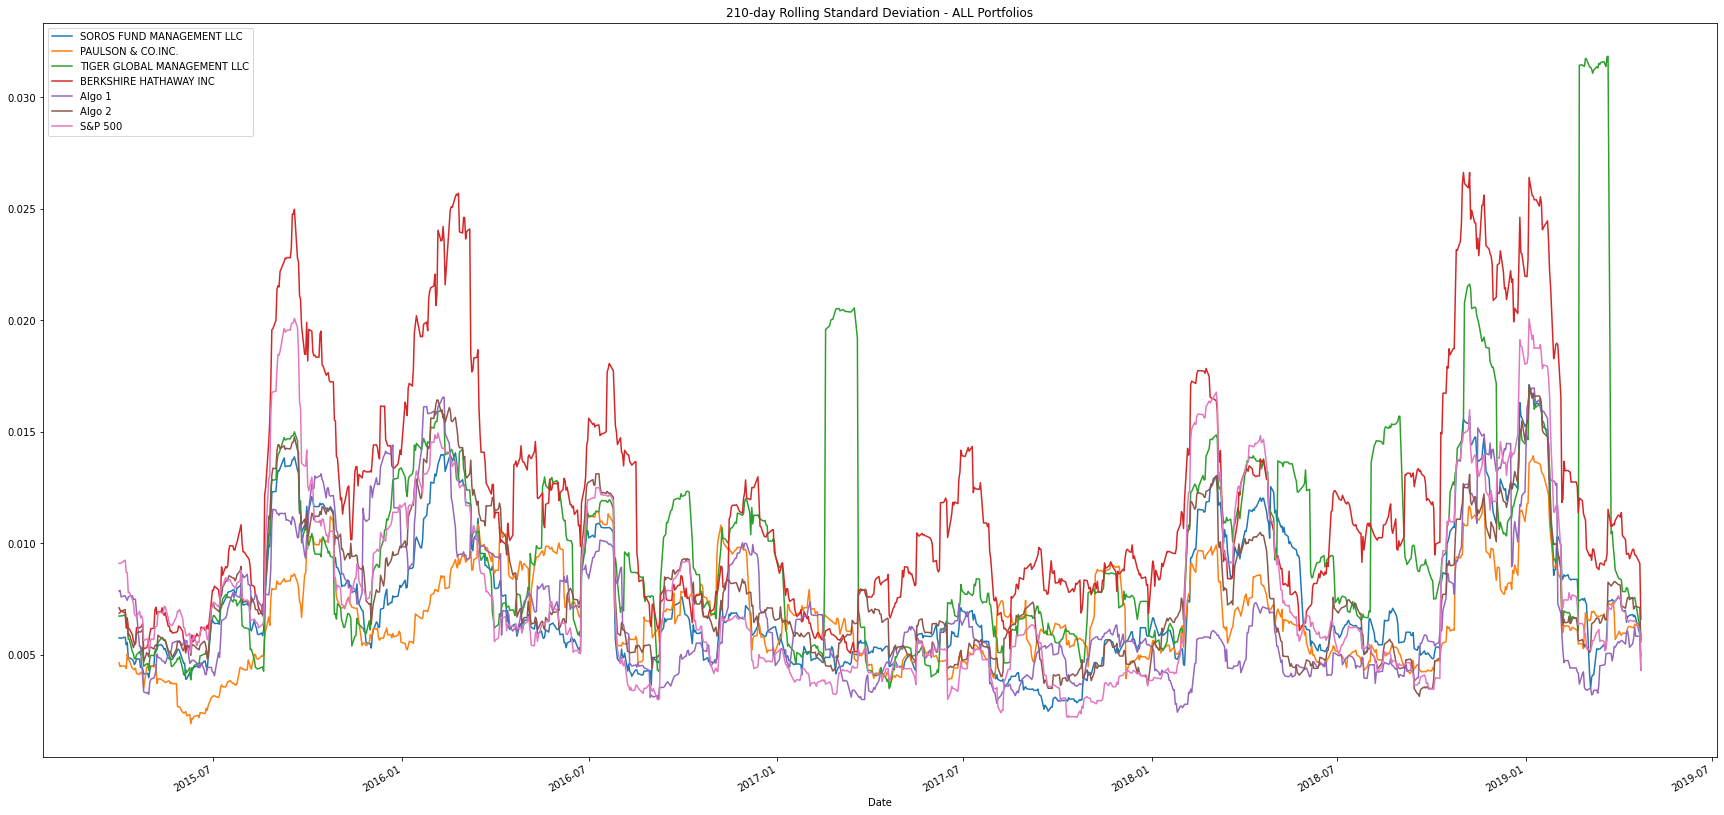

In [21]:
# calculating the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()

# ploting the rolling standard deviation
print(all_portfolios_roll_std.plot(figsize=(30, 15), title="210-day Rolling Standard Deviation - ALL Portfolios"))

### Correlation

In [22]:
# calculating the correlation
corr_df = all_portfolios.corr()

# display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


AxesSubplot(0.125,0.2;0.775x0.68)


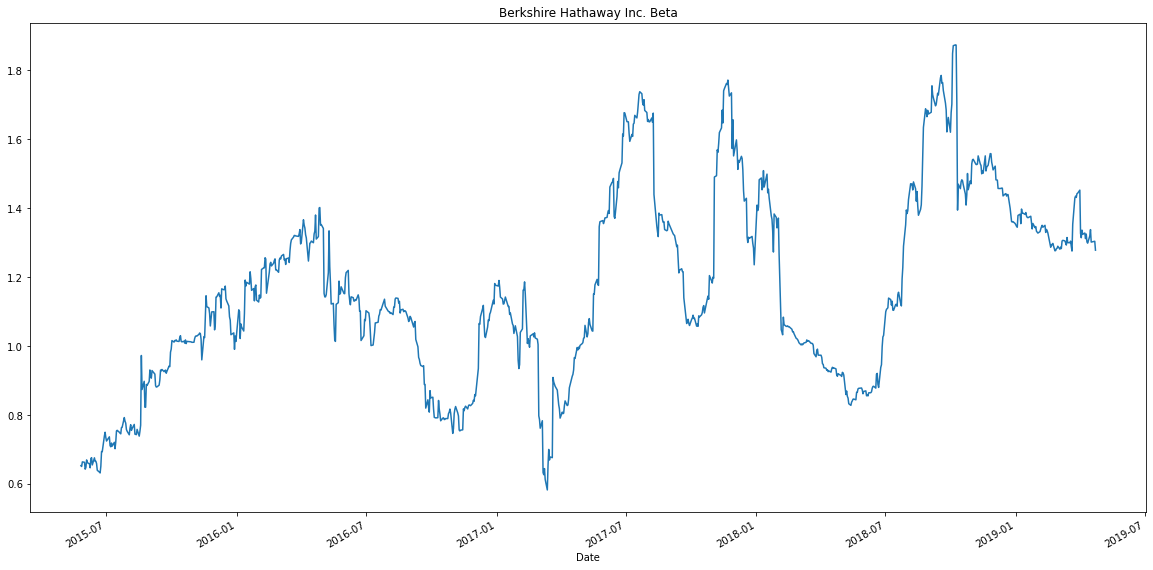

In [23]:
# calculate covariance of a single portfolio
covariance = all_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolios["S&P 500"])

# calculate variance of S&P TSX
variance = all_portfolios["S&P 500"].rolling(60).var()

# computing beta
beta = covariance / variance

# plot beta
print(beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta"))

## Rolling Statistics: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. 
<br>
This is like a moving window average, but it assigns greater importance to more recent observations. Here we calculate the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

AxesSubplot(0.125,0.2;0.775x0.68)


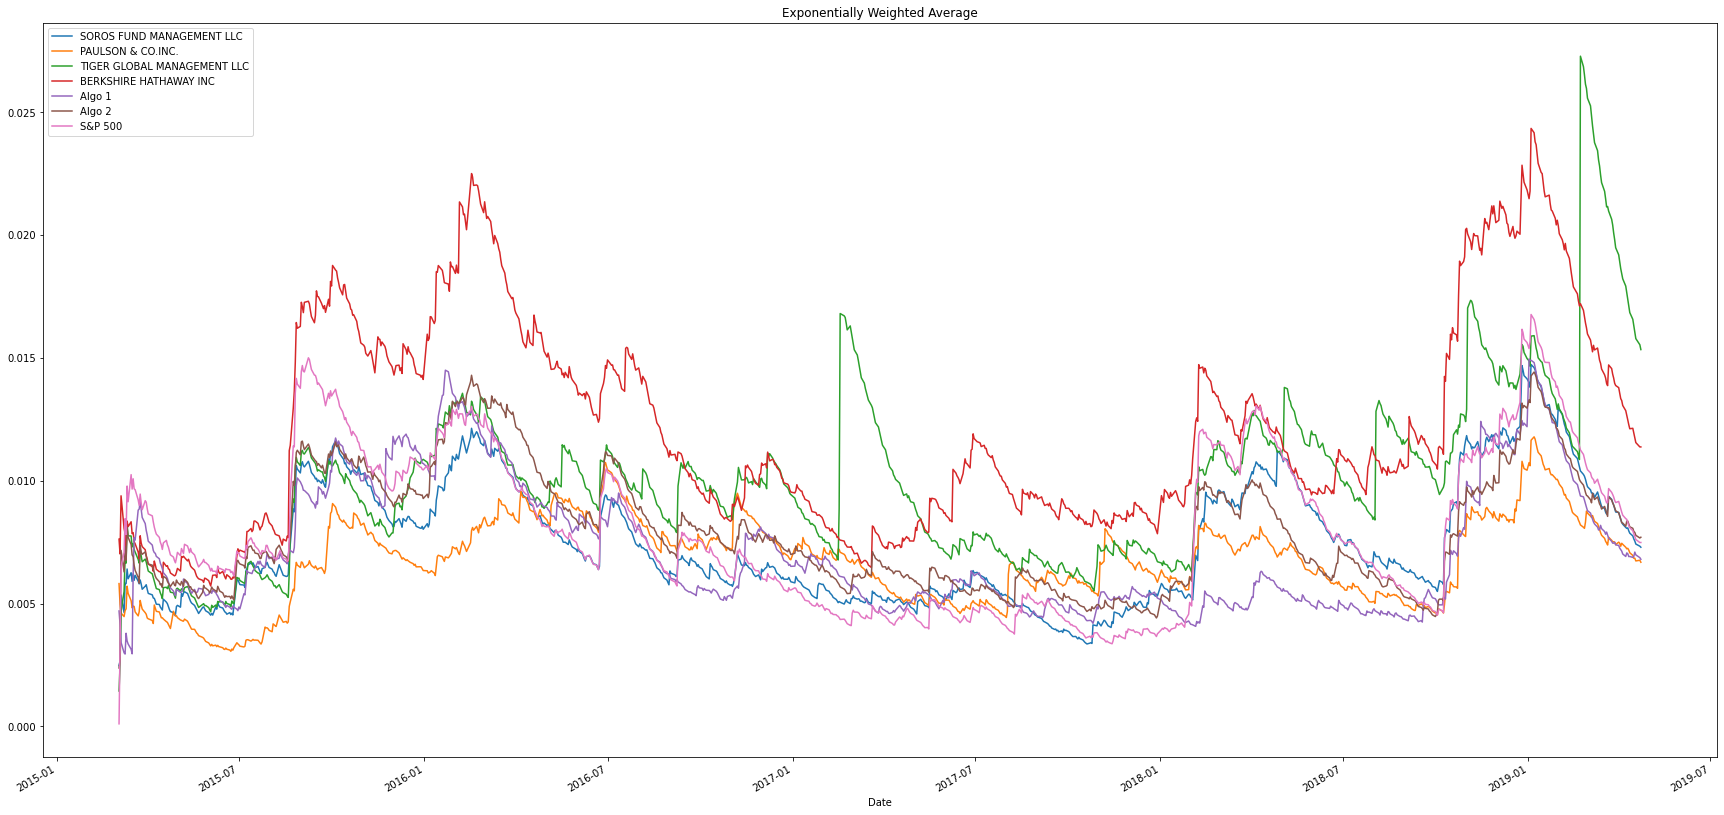

In [24]:
print(all_portfolios.ewm(halflife=21).std().plot(figsize=(30, 15), title="Exponentially Weighted Average"))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# annualized Sharpe-Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


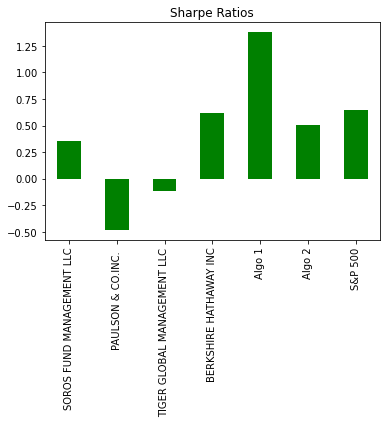

In [26]:
# visualize the sharpe ratios as a bar plot
print(sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", color='green'))

---

# Leiland's Custom Portfolio

In this section, I build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3 custom stocks [I'm choosing PFE, TWTR, & LMT] with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

* `PFE` - PFIZER

* `TWTR` - TWITTER

* `LMT` - LOCKHEED MARTIN

In [27]:
# reading data from 1st stock
pfizer_historical_csv = Path("pfe_historical.csv")
pfizer_historical = pd.read_csv(
    pfizer_historical_csv, 
    index_col="Trade DATE", 
    infer_datetime_format=True, 
    parse_dates=True
    )
pfizer_historical = pfizer_historical.sort_index()
pfizer_historical.head()

,Symbol,NOCP
Trade DATE,,
2021-08-09,PFE,45.98
2021-08-10,PFE,48.19
2021-08-11,PFE,46.31
2021-08-12,PFE,47.24
2021-08-13,PFE,48.48


In [28]:
# reading data from 2nd stock
twitter_historical_csv = Path("twtr_historical.csv")
twitter_historical = pd.read_csv(
    twitter_historical_csv, 
    index_col="Trade DATE", 
    infer_datetime_format=True, 
    parse_dates=True
    )
twitter_historical = twitter_historical.sort_index()
twitter_historical.head()

,Symbol,NOCP
Trade DATE,,
2021-08-09,TWTR,67.01
2021-08-10,TWTR,65.68
2021-08-11,TWTR,65.46
2021-08-12,TWTR,64.95
2021-08-13,TWTR,64.82


In [29]:
# reading data from 3rd stock
lockheed_historical_csv = Path("lmt_historical.csv")
lockheed_historical = pd.read_csv(
    lockheed_historical_csv, 
    index_col="Trade DATE", 
    infer_datetime_format=True, 
    parse_dates=True
    )
lockheed_historical = lockheed_historical.sort_index()
lockheed_historical.head()

,Symbol,NOCP
Trade DATE,,
2021-08-09,LMT,361.04
2021-08-10,LMT,362.24
2021-08-11,LMT,363.30
2021-08-12,LMT,359.75
2021-08-13,LMT,357.98


In [30]:
# combine all stocks in a single DataFrame
all_stocks = pd.concat([pfizer_historical, twitter_historical, lockheed_historical], axis="rows", join="inner")
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2021-08-09,PFE,45.98
2021-08-10,PFE,48.19
2021-08-11,PFE,46.31
2021-08-12,PFE,47.24
2021-08-13,PFE,48.48


In [31]:
# reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2021-08-09,PFE,45.98
1,2021-08-10,PFE,48.19
2,2021-08-11,PFE,46.31
3,2021-08-12,PFE,47.24
4,2021-08-13,PFE,48.48


In [32]:
# reorganize portfolio data by having a column per symbol
portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,LMT,PFE,TWTR
Trade DATE,,,
2021-08-09,361.04,45.98,67.01
2021-08-10,362.24,48.19,65.68
2021-08-11,363.30,46.31,65.46
2021-08-12,359.75,47.24,64.95
2021-08-13,357.98,48.48,64.82


In [33]:
# calculate daily returns
daily_returns = portfolio.pct_change()

# drop NAs
daily_returns = daily_returns.dropna().copy()

# display sample data
daily_returns.head()

Symbol,LMT,PFE,TWTR
Trade DATE,,,
2021-08-10,0.003324,0.048064,-0.019848
2021-08-11,0.002926,-0.039012,-0.003350
2021-08-12,-0.009772,0.020082,-0.007791
2021-08-13,-0.004920,0.026249,-0.002002
2021-08-16,0.006341,0.008870,-0.016044


## Here I calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# set weights < -- equal shares
weights = [1/3, 1/3, 1/3]

# calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2021-08-10    0.010513
2021-08-11   -0.013145
2021-08-12    0.000840
2021-08-13    0.006442
2021-08-16   -0.000278
dtype: float64

In [35]:
# joining my returns DF to the original returns DF
all_portfolios["Custom"] = portfolio_returns
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,NaN
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,NaN
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,NaN
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,NaN
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,NaN


In [43]:
# only compare dates where return data exists for all the stocks (drop NaNs)
# all_portfolios = all_portfolios.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# calculate the annualized `std`
risk = all_portfolios.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom                              NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

AxesSubplot(0.125,0.2;0.775x0.68)


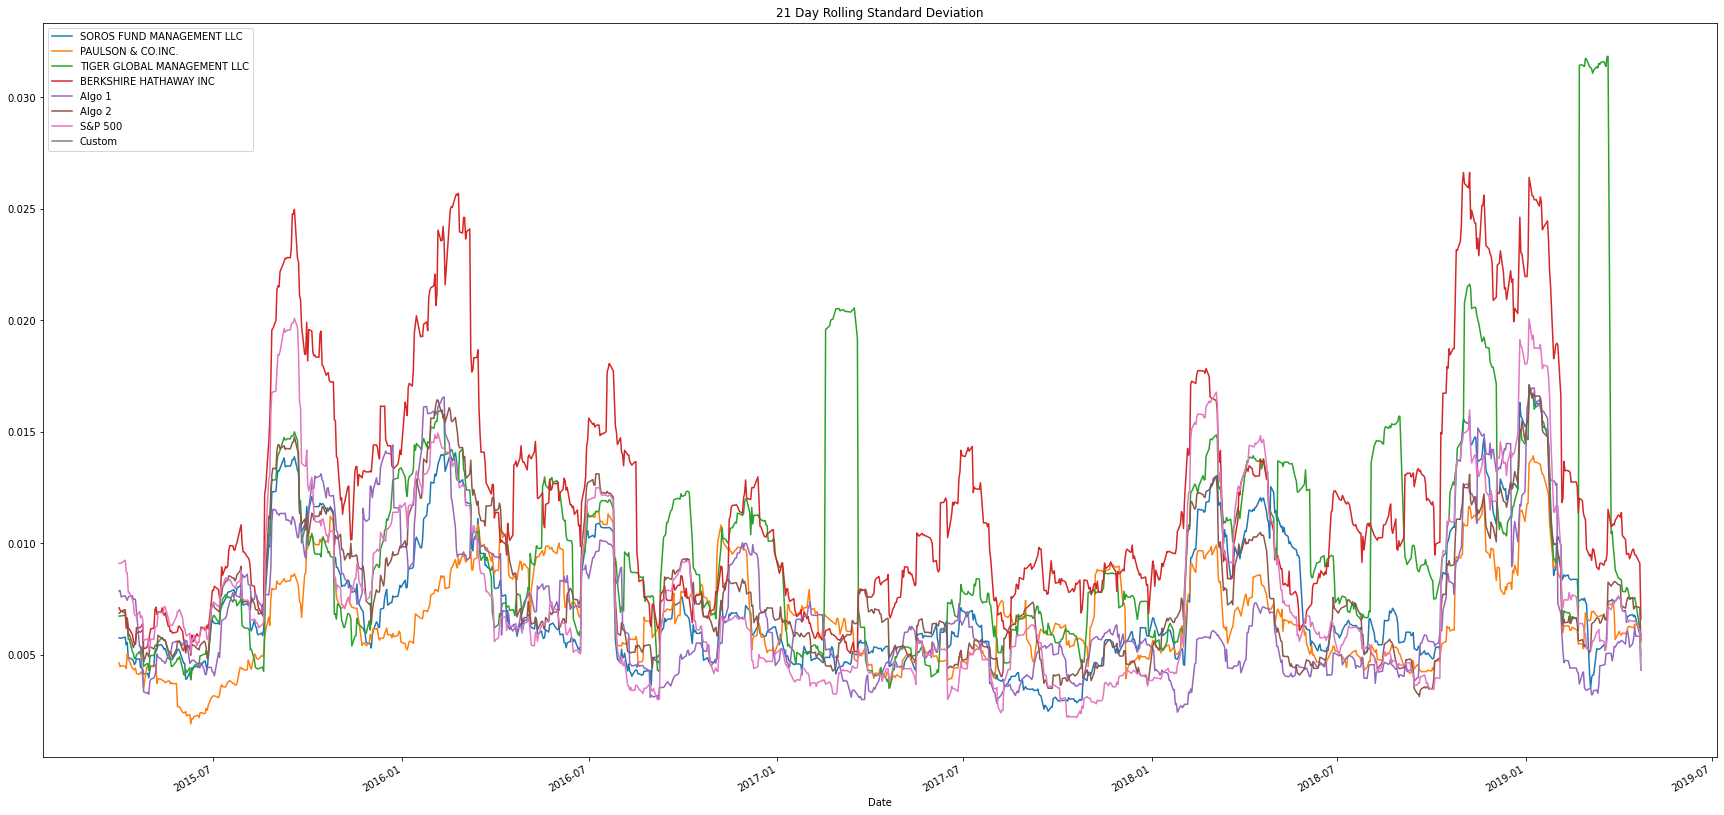

In [39]:
# calculate rolling standard deviation
rolling_std_dev = all_portfolios.rolling(window=21).std()

# plot rolling standard deviation
print(rolling_std_dev.plot(figsize=(30, 15), title="21 Day Rolling Standard Deviation"))

### Calculate and plot the correlation

In [40]:
# calculate and plot the correlation

df = all_portfolios.corr()
df.style.background_gradient(cmap="bwr")

C:\Users\leila\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\leila\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,nan
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,nan
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,nan
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,nan
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,nan
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,nan
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,nan
Custom,nan,nan,nan,nan,nan,nan,nan,nan


### Calculate and Plot Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

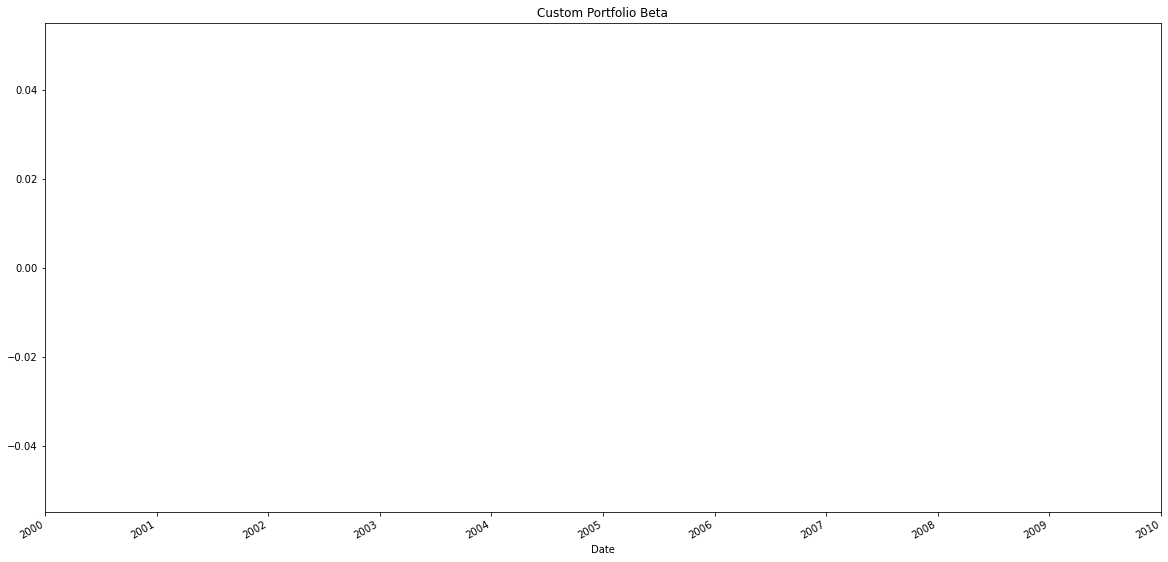

In [41]:
# Calculate and plot Beta
covariance = all_portfolios["Custom"].rolling(window=60).cov(all_portfolios["S&P 500"])
variance = all_portfolios["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom                              NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

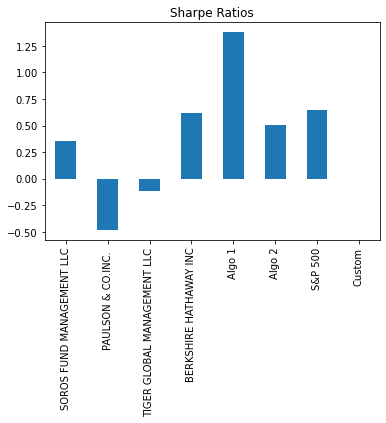

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Considering the data I used for my 3 tickers were recent and don't match up with the dates in the original package - it doesn't compare. I will need to go back and re-pull the historical data for the correct dates and retry. 